
# 🏎️ Canadian GP 2024 Strategy Simulation

  
**Goal:** Optimize pitstop strategies using EDA, tire degradation, pitstop duration, simple ML, and game theory.

✅ Includes stint charts, tire degradation with pit markers, pitstop loss and ML winner prediction

🚨 _Real race conditions like track temp, traffic, Safety Car, and tire deg must be monitored in real time — these are assumptions in the current scenario._


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set(style='whitegrid')

# Constants
LAPS = 70
PIT_LOSS = 23
LAP_DELTA_NEW_TIRES = 0.3


In [15]:

stints_sim_compound = {
    'Norris': [(0, 15, 'Soft'), (15, 40, 'Medium'), (40, 70, 'Hard')],
    'Russell': [(0, 30, 'Medium'), (30, 70, 'Hard')],
    'Verstappen': [(0, 25, 'Medium'), (25, 70, 'Hard')]
}

colors_compound = {'Soft': 'red', 'Medium': 'yellow', 'Hard': 'grey'}


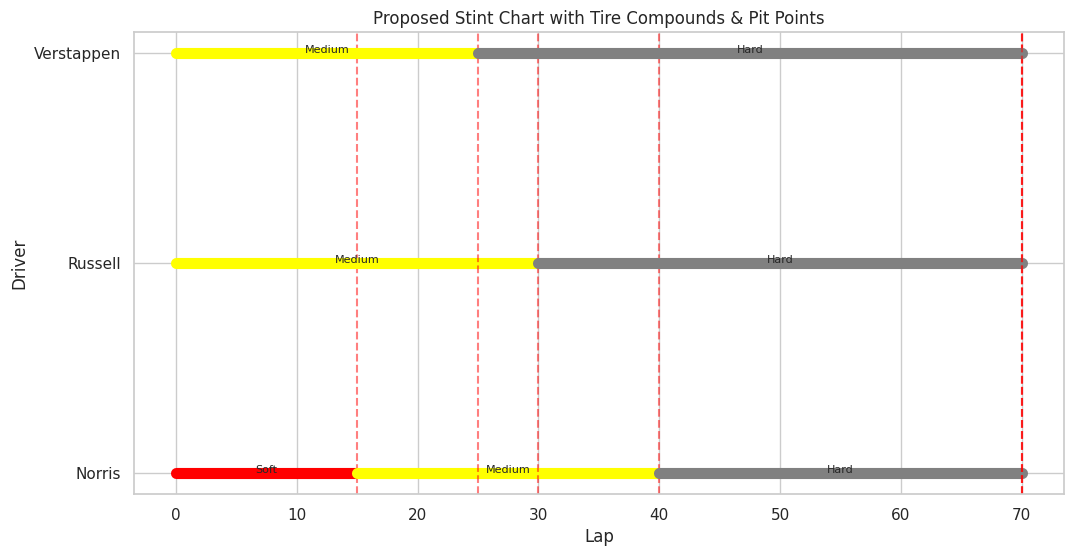

In [16]:

fig, ax = plt.subplots(figsize=(12, 6))
for driver, stints in stints_sim_compound.items():
    for stint in stints:
        ax.plot([stint[0], stint[1]], [driver, driver], lw=8, color=colors_compound[stint[2]])
        ax.text((stint[0]+stint[1])/2, driver, stint[2], ha='center', fontsize=8)
        ax.axvline(stint[1], color='red', linestyle='--', alpha=0.5)
ax.set_title('Proposed Stint Chart with Tire Compounds & Pit Points')
ax.set_xlabel('Lap')
ax.set_ylabel('Driver')
plt.show()


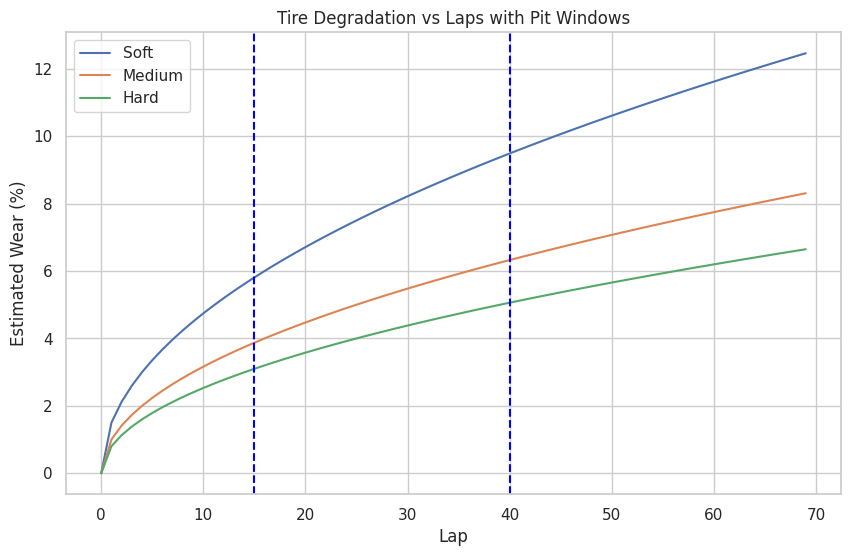

In [17]:

laps = np.arange(0, LAPS)
soft_deg = 1.5 * np.sqrt(laps)
medium_deg = np.sqrt(laps)
hard_deg = 0.8 * np.sqrt(laps)

plt.figure(figsize=(10, 6))
plt.plot(laps, soft_deg, label='Soft')
plt.plot(laps, medium_deg, label='Medium')
plt.plot(laps, hard_deg, label='Hard')

for lap in [15, 40]:
    plt.axvline(x=lap, color='blue', linestyle='--')
plt.title('Tire Degradation vs Laps with Pit Windows')
plt.xlabel('Lap')
plt.ylabel('Estimated Wear (%)')
plt.legend()
plt.show()


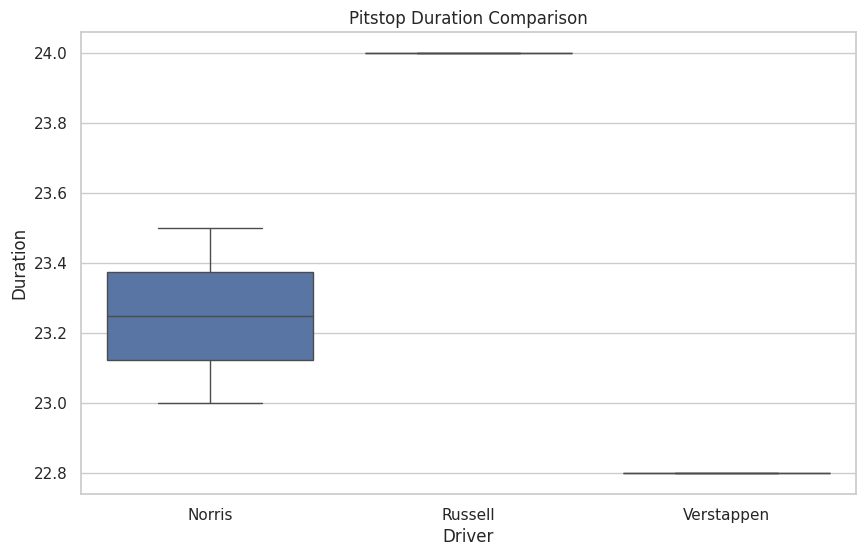

In [18]:

pit_durations = {
    'Norris': [23.5, 23.0],
    'Russell': [24.0],
    'Verstappen': [22.8]
}

data = []
for driver, stops in pit_durations.items():
    for dur in stops:
        data.append({'Driver': driver, 'Duration': dur})

df_pit = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_pit, x='Driver', y='Duration')
plt.title('Pitstop Duration Comparison')
plt.show()


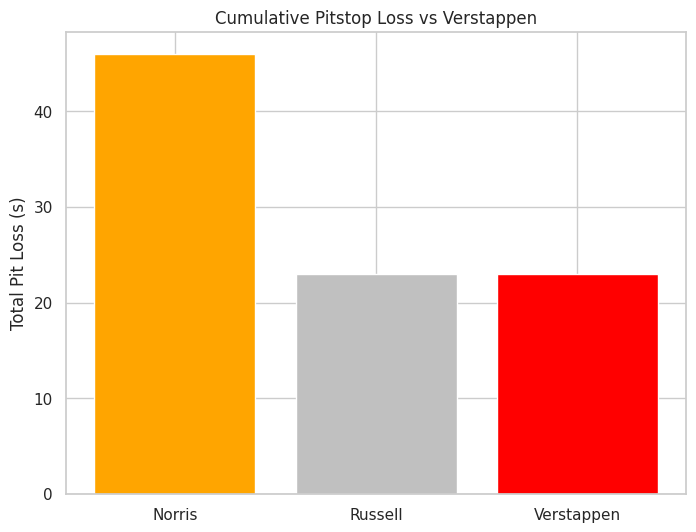

In [19]:

pit_loss = {
    'Norris': 2 * PIT_LOSS,
    'Russell': 1 * PIT_LOSS,
    'Verstappen': 1 * PIT_LOSS
}

teams = ['Norris', 'Russell', 'Verstappen']
losses = [pit_loss[t] for t in teams]

plt.figure(figsize=(8, 6))
plt.bar(teams, losses, color=['orange', 'silver', 'red'])
plt.title('Cumulative Pitstop Loss vs Verstappen')
plt.ylabel('Total Pit Loss (s)')
plt.show()


In [20]:

X = np.array([
    [46, 2],  # Norris
    [23, 1],  # Russell
    [23, 1]   # Verstappen
])
y = [2, 3, 1]

model = LinearRegression().fit(X, y)

preds = model.predict(X)
print(f'Predicted finish positions: {preds.round(2)}')


Predicted finish positions: [2. 2. 2.]


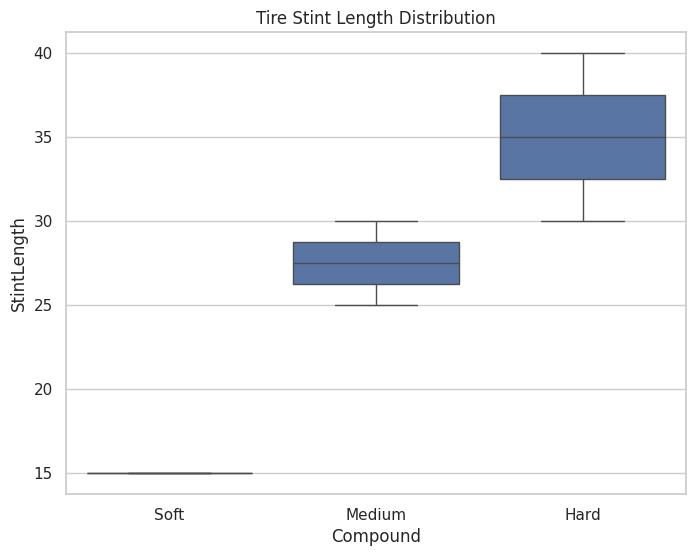

In [21]:

stint_lengths = {
    'Soft': [15],
    'Medium': [25, 30],
    'Hard': [30, 40]
}

data = []
for compound, stints in stint_lengths.items():
    for s in stints:
        data.append({'Compound': compound, 'StintLength': s})

df_stints = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_stints, x='Compound', y='StintLength')
plt.title('Tire Stint Length Distribution')
plt.show()
